# ROAM Challenge 2: LATAM Out-of-Distribution Few-shot Challenge

In [40]:
from IPython.display import IFrame
src="https://sebastianraschka.com/faq/docs/few-shot.html#:~:text=In%20regular%20supervised%20learning%2C%20we,task%20consists%20of%20different%20classes"
width=920
height=1080
IFrame(src, width, height)

reference: "https://encord.com/blog/few-shot-learning-in-computer-vision/"

There are various subsets of the ImageNet dataset used in various context. One of the most highly used subset of ImageNet is the "ImageNet Large Scale Visual Recognition Challenge (ILSVRC) 2012–2017 image classification and localization dataset". This is also referred to in the research literature as ImageNet-1K or ILSVRC2017, reflecting the original ILSVRC challenge that involved 1,000 classes. ImageNet-1K contains 1,281,167 training images, 50,000 validation images and 100,000 test images.[15] The full original dataset is referred to as ImageNet-21K. ImageNet-21k contains 14,197,122 images divided into 21,841 classes. Some papers round this up and name it ImageNet-22k.

In [1]:
import sys
import os
import pathlib 
import pandas as pd

In [2]:
data_path = "/home/shravan/documents/deeplearning/github/ComputerVision-Research/finetuning/roam2/data"

In [3]:
data_path1 = pathlib.Path(data_path)

In [4]:
os.listdir(data_path1)

['.ipynb_checkpoints',
 'support_samples',
 'solutionAugust5.csv',
 'support.csv',
 'evaluation_data',
 'supportAugust5.tar',
 'PartialRelease.tar']

In [60]:
from glob import glob

In [62]:
image_paths = glob(f"{data_path}/evaluation_data/*.jpg")

In [5]:
images_list = (os.listdir(f"{data_path}/evaluation_data"))

In [76]:
support_sample_imagepaths = glob(f"{data_path}/support_samples/*.jpg")

In [80]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

def plot_images(image_paths, cols=3, figsize=(12, 8)):
    """Plots a set of images in a grid.

    Args:
    image_paths: A list of image file paths.
    cols: Number of columns in the grid.
    figsize: Figure size.
    """

    rows = len(image_paths) // cols + (len(image_paths) % cols > 0)
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.ravel()

    for i, image_path in enumerate(image_paths):
        img = mpimg.imread(image_path)
        axes[i].imshow(img)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

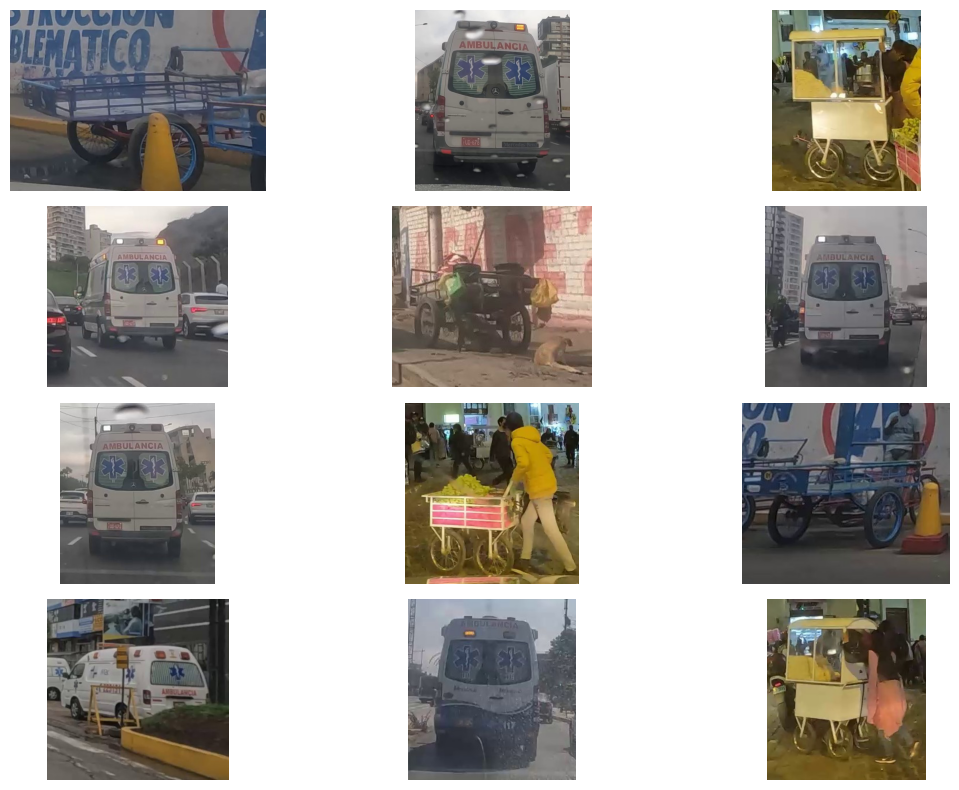

In [81]:
plot_images(support_sample_imagepaths)

In [7]:
len(images_list)

5000

In [8]:
df_support = pd.read_csv(data_path1/"support.csv")

In [9]:
df_support

,id,label
0,cdbc673d9eab4bb1a7edc5cd804588d3,1
1,160519cec29849c780ac2ba958ab52ca,1
2,05b75a8e417e4ee79dcdd4f04660c53c,1
3,508435b119d04b18b4ca4b68131e375b,1
4,e33b3abe21af47b5af93b92d41e383a9,1
5,8e7a5214307244218ae7a87d675d6358,1
6,95aa8f477e5b44379486a7b5dd33b118,2
7,6c303e6c344d4007ba3aceddf5987a1f,2
8,2c2c94a8ce304405a15df01c853f854b,2
9,ccaf12198649464da6c48caf3b0763b2,2


In [10]:
df_support.groupby('label').count()

,id
label,
1,6
2,6


In [50]:
df_solutionAugust5 = pd.read_csv(data_path1/"solutionAugust5.csv")

In [51]:
df_solutionAugust5

,id,split,label
0,afc50dc671ea44fb8375b560c8019b43,public,0
1,621af6f5776541c78bf344b177bdb7ad,public,0
2,1287bddbad1c47e79965dfb5458b8098,public,0
3,a735c1ba09cb47f8be1f21cbdb95c84e,public,0
4,b6142dd35c4e4a888b9fb835c38cb6e2,public,0
...,...,...,...
4995,01458799bc6e4005bc6988abfb710317,public,0
4996,063ac9587b0f46bcae1dd0e5599beebc,public,0
4997,97c7c29232fd496a8e5dcf2469c6e864,public,0
4998,3b542a9f862b4e32b572fd467b7d6cfb,public,0


In [54]:
df_solutionAugust5[['id', 'label']].groupby('label').count()

,id
label,
0,4922
1,43
2,35


In [98]:
eval_c0_df = df_solutionAugust5[df_solutionAugust5['label'].isin([0])]
eval_c0_df

,id,split,label
0,afc50dc671ea44fb8375b560c8019b43,public,0
1,621af6f5776541c78bf344b177bdb7ad,public,0
2,1287bddbad1c47e79965dfb5458b8098,public,0
3,a735c1ba09cb47f8be1f21cbdb95c84e,public,0
4,b6142dd35c4e4a888b9fb835c38cb6e2,public,0
...,...,...,...
4995,01458799bc6e4005bc6988abfb710317,public,0
4996,063ac9587b0f46bcae1dd0e5599beebc,public,0
4997,97c7c29232fd496a8e5dcf2469c6e864,public,0
4998,3b542a9f862b4e32b572fd467b7d6cfb,public,0


In [96]:
eval_c1_df = df_solutionAugust5[df_solutionAugust5['label'].isin([1])]
eval_c1_df

,id,split,label
117,378ceead8a234de1a0f90e9b29f98f77,public,1
219,e23ea26b5ec24e0f9e312ca2cb6d1435,public,1
281,35a2cf618fe445db821e3667bd3b055d,public,1
344,38acfe3b276d42c8928da6c98f618dfc,public,1
471,557d7143268d4ba39b4a65c0c4a39a21,public,1
532,b05585581727401289d3f9d90e059d5c,public,1
580,efeec6040f7d427fa56dc80d2ba76ef5,public,1
710,263e377ccdda4eda82355bdc5d519457,public,1
906,5d48325b585544be8bd833793800e2cb,public,1
941,d2d6aae34a12481ea88864cd445593ac,public,1


In [97]:
eval_c2_df = df_solutionAugust5[df_solutionAugust5['label'].isin([2])]
eval_c2_df

,id,split,label
257,b52e48b7f7ca4a0a900d4437690f6f65,public,2
285,50178fd8b7db4080913444c63a6d335d,public,2
493,8756d8dc621348d99e0de625153f67c5,public,2
558,5ee0518b1f014f3a8e175660e6dcbd54,public,2
734,553c717c1fae4086832774c3a3568aa1,public,2
742,501fb826a54e44648cf2c2951a43fb2d,public,2
875,69500f7be0634fd1b50e77d15978b98c,public,2
943,064348ed1c3945508957a3d3bb817610,public,2
1244,8fc98c063ebc4eb8954d0a0f8594ec2d,public,2
1283,4702cc854b694a858602d692e70b78ba,public,2


In [100]:
eval_c1 = eval_c1_df['id'].tolist()

In [101]:
eval_c1

['378ceead8a234de1a0f90e9b29f98f77',
 'e23ea26b5ec24e0f9e312ca2cb6d1435',
 '35a2cf618fe445db821e3667bd3b055d',
 '38acfe3b276d42c8928da6c98f618dfc',
 '557d7143268d4ba39b4a65c0c4a39a21',
 'b05585581727401289d3f9d90e059d5c',
 'efeec6040f7d427fa56dc80d2ba76ef5',
 '263e377ccdda4eda82355bdc5d519457',
 '5d48325b585544be8bd833793800e2cb',
 'd2d6aae34a12481ea88864cd445593ac',
 '9e56e19b0da343dc89d9ee3784bcbd6c',
 'f6544f69f26d4a538a8769e37080b00c',
 '254e19fe8f894be298a2eb47c7a0af6c',
 '498f38a05ff14b7dab84e087c90386f7',
 '95ae981f830448c4ac42d61206356592',
 '954496cf9bd74ba4a930c5f8ceebe8d1',
 '0c636198b90b4c52bab96418a33e3db0',
 '69441a82b36a46eca6d1912d6b7a1813',
 '07642ffc29e74427824e843f1551c806',
 '543c5aae432e44a3b1fce42df7c7e6d0',
 '8cc41a963b67464282fc1741ebb69e63',
 'dac4f9bc827c45ad936e4ae5c15bca88',
 '1662676be876452f8d28ff830b47ee01',
 'd04a6fd9dda74234b19995428255184e',
 '54b23797b17b4f4496ece9af9dd330a9',
 '7c070de9e3ca49a0bed369cb38657b9f',
 '2502f18259474d1e9d45bf19f82e9042',
 

In [89]:
image_paths[:4]

['/home/shravan/documents/deeplearning/github/ComputerVision-Research/finetuning/roam2/data/evaluation_data/afdbce739666437183eef082e728f43d.jpg',
 '/home/shravan/documents/deeplearning/github/ComputerVision-Research/finetuning/roam2/data/evaluation_data/1a314417371e40f887480fece58bb677.jpg',
 '/home/shravan/documents/deeplearning/github/ComputerVision-Research/finetuning/roam2/data/evaluation_data/81389f2c47cb4b5fae307e53ae6c0142.jpg',
 '/home/shravan/documents/deeplearning/github/ComputerVision-Research/finetuning/roam2/data/evaluation_data/16dce065bb544928aef33b59ca62ffca.jpg']

In [102]:
list1 = ([os.path.splitext(i)[0] for i in images_list])

In [93]:
# # Find common IDs
# common_ids = list(set(eval_c1_c2) & set(list1))

# # Find the corresponding paths
# common_image_paths = [path for path in image_paths if path.split('/')[-1].split('.')[0] in common_ids]

# len(common_image_paths)

78

In [103]:
# Extract IDs from image_paths
image_ids = [path.split('/')[-1].split('.')[0] for path in image_paths]

# Find common IDs
common_ids = list(set(eval_c1) & set(image_ids))

# Find the corresponding paths
common_image_paths = [path for path in image_paths if path.split('/')[-1].split('.')[0] in common_ids]

# common_image_paths

In [104]:
len(eval_c1)

43

In [105]:
len(common_image_paths)

43

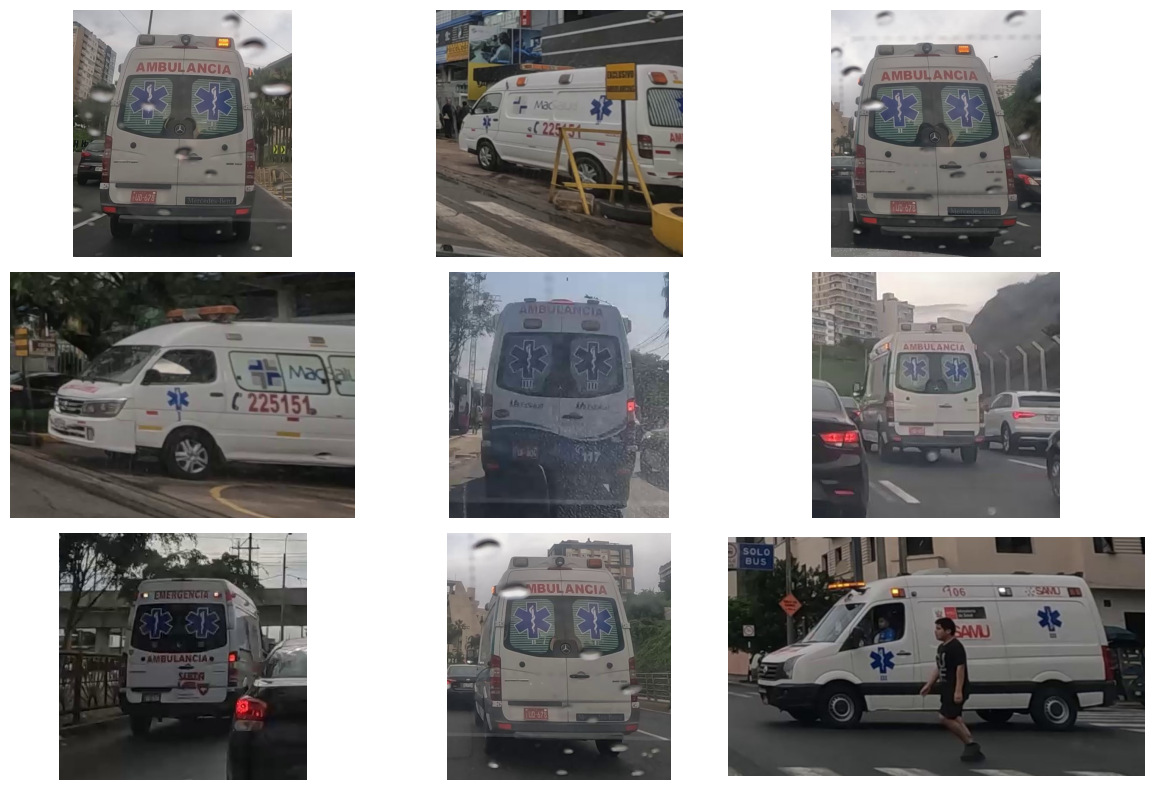

In [108]:
plot_images(common_image_paths[:9])

In [55]:
list2 = (df_solutionAugust5['id'].tolist())

In [56]:
common_elements = [x for x in list1 if x in list2]
len(common_elements)

5000

## Infer on Single Image

In [57]:
from transformers import AutoImageProcessor, Dinov2ForImageClassification
import torch
from datasets import load_dataset

# dataset = load_dataset("huggingface/cats-image", trust_remote_code=True)
# image = dataset["test"]["image"][0]

In [58]:
image_processor = AutoImageProcessor.from_pretrained("facebook/dinov2-small-imagenet1k-1-layer")
model = Dinov2ForImageClassification.from_pretrained("facebook/dinov2-small-imagenet1k-1-layer")

preprocessor_config.json:   0%|          | 0.00/436 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/58.3k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/91.3M [00:00<?, ?B/s]

In [65]:
from PIL import Image

In [109]:
image = Image.open(image_paths[4737])

In [110]:
inputs = image_processor(image, return_tensors="pt")

In [111]:
with torch.no_grad():
    logits = model(**inputs).logits

# model predicts one of the 1000 ImageNet classes
predicted_label = logits.argmax(-1).item()
print(model.config.id2label[predicted_label])

garbage truck, dustcart


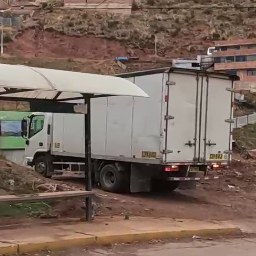

In [112]:
image

## Make Prediction over Evaluation Set and write to submission.csv

In [114]:
from transformers import AutoImageProcessor, Dinov2ForImageClassification
import torch
import pandas as pd
from PIL import Image
import os

# Define base directory and CSV file path
base_dir = "/home/shravan/documents/deeplearning/github/ComputerVision-Research/finetuning/roam2/"
csv_file_path = os.path.join(base_dir, "data/solutionAugust5.csv")

# Load your existing CSV file
df = pd.read_csv(csv_file_path)

# Load the image processor and model
image_processor = AutoImageProcessor.from_pretrained("facebook/dinov2-small-imagenet1k-1-layer")
model = Dinov2ForImageClassification.from_pretrained("facebook/dinov2-small-imagenet1k-1-layer")

# Prepare a list to store the predictions
predictions = []

# Iterate over the images and make predictions
image_dir = os.path.join(base_dir, "data/evaluation_data/")
for idx, row in df[:5].iterrows():
    # Construct the full image path
    image_filename = f"{row['id']}.jpg"
    image_path = os.path.join(image_dir, image_filename)
    
    # Open and process the image
    image = Image.open(image_path)
    inputs = image_processor(image, return_tensors="pt")

    with torch.no_grad():
        logits = model(**inputs).logits
    
    predicted_label = logits.argmax(-1).item()
    
    # Append the prediction to the list
    predictions.append({'id': row['id'], 'label': predicted_label})

# Convert the list to a DataFrame
submission_df = pd.DataFrame(predictions)

# Save the submission DataFrame to a CSV file with the required format
submission_file_path = os.path.join(base_dir, "submission.csv")
submission_df.to_csv(submission_file_path, index=False)


In [115]:
submission_df

,id,label
0,afc50dc671ea44fb8375b560c8019b43,675
1,621af6f5776541c78bf344b177bdb7ad,656
2,1287bddbad1c47e79965dfb5458b8098,627
3,a735c1ba09cb47f8be1f21cbdb95c84e,919
4,b6142dd35c4e4a888b9fb835c38cb6e2,468


In [117]:
# submission_df['label_desc'] = 
submission_df['label'].apply(lambda x: model.config.id2label[x])

# # Add a description column for the predicted labels
# submission_df['label_desc'] = submission_df['label'].apply(lambda x: model.config.id2label[x])


0                  moving van
1                     minivan
2             limousine, limo
3                 street sign
4    cab, hack, taxi, taxicab
Name: label, dtype: object